<a href="https://colab.research.google.com/github/114576u/machine-learning/blob/master/linear_regression_with_synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This is obtained from 
# https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=linear_regression_synthetic_tf2-colab&hl=en
# in the context of the machine learning training from
# https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/programming-exercises

In [1]:

import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [3]:

# we are defining the function that builds the model (an empty model)
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # most simple tf.keras models are sequential
  # a sequential model contains one or more layers
  model = tf.keras.models.Sequential()

  # describe the topography of the model
  # the topography of a simple linear regression model
  # is a single node in a single layer
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # compile the model topography into code that
  # TensorFlow can efficiently execute. Configure
  # training to minimize the model's mean squared error.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()]
                )
  return model

print("Defined build_model")

Defined build_model


In [4]:

# trains the model from the examples (feature and label) that we pass
def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding data."""

  # feed the feature values and the label values to the
  # model. The model will train for the specified number
  # of epochs, gradually learning how the feature values
  # related to the label values
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs
                      )
  # gather the trained model's weight and bias
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # the list of epochs is stored separately from the rest of history
  epochs = history.epoch

  # gather the history (or snapshot) of each epoch
  hist = pd.DataFrame(history.history)

  # specifically gather the model's root mean squared error at each epoch
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined train_model")

Defined train_model


In [5]:

# define a plotting function
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # label the axes
  plt.xlabel("feature")
  plt.ylabel("label")

  # plot the feature values vs. label values
  plt.scatter(feature, label)

  # create a red line representing the model. The red line starts at coordinates (x0, y0) and ends at coordinates (x1, y1)
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # render the scatter plot and the red line
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [6]:

# now we define the dataset
my_feature = ([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8, 9.6, 14.2, 18.18, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 351ms/step - loss: 531.1696 - root_mean_squared_error: 23.0471
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 519.2125 - root_mean_squared_error: 22.7862
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 510.6696 - root_mean_squared_error: 22.5980
Epoch 4/10
1/1 [==============================] - 0s 13ms/step - loss: 503.5942 - root_mean_squared_error: 22.4409
Epoch 5/10
1/1 [==============================] - 0s 11ms/step - loss: 497.3701 - root_mean_squared_error: 22.3018
Epoch 6/10
1/1 [==============================] - 0s 11ms/step - loss: 491.7118 - root_mean_squared_error: 22.1746
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 486.4606 - root_mean_squared_error: 22.0559
Epoch 8/10
1/1 [==============================] - 0s 14ms/step - loss: 481.5177 - root_mean_squared_error: 21.9435
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 476.8171 - root_mea

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


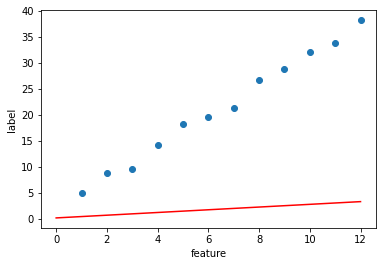

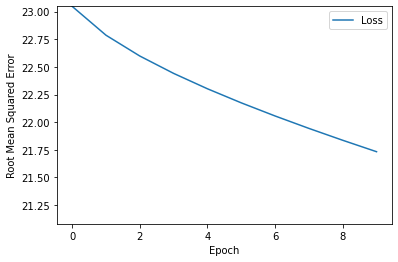

In [10]:

# defining now the hyperparameters
learning_rate = 0.01
epochs = 10
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)


Examine the top graph. The blue dots identify the actual data; the red line identifies the output of the trained model. Ideally, the red line should align nicely with the blue dots. Does it? Probably not.

A certain amount of randomness plays into training a model, so you'll get somewhat different results every time you train. That said, unless you are an extremely lucky person, the red line probably doesn't align nicely with the blue dots.

Examine the bottom graph, which shows the loss curve. Notice that the loss curve decreases but doesn't flatten out, which is a sign that the model hasn't trained sufficiently.

Training loss should steadily decrease, steeply at first, and then more slowly. Eventually, training loss should eventually stay steady (zero slope or nearly zero slope), which indicates that training has converged.

In Task 1, the training loss did not converge. One possible solution is to train for more epochs. Your task is to increase the number of epochs sufficiently to get the model to converge. However, it is inefficient to train past convergence, so don't just set the number of epochs to an arbitrarily high value.

Examine the loss curve. Does the model converge?

Epoch 1/500


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 320ms/step - loss: 792.0502 - root_mean_squared_error: 28.1434
Epoch 2/500
1/1 [==============================] - 0s 9ms/step - loss: 777.4328 - root_mean_squared_error: 27.8825
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 766.9600 - root_mean_squared_error: 27.6940
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 758.2688 - root_mean_squared_error: 27.5367
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 750.6106 - root_mean_squared_error: 27.3973
Epoch 6/500
1/1 [==============================] - 0s 13ms/step - loss: 743.6382 - root_mean_squared_error: 27.2697
Epoch 7/500
1/1 [==============================] - 0s 13ms/step - loss: 737.1587 - root_mean_squared_error: 27.1507
Epoch 8/500
1/1 [==============================] - 0s 11ms/step - loss: 731.0518 - root_mean_squared_error: 27.0380
Epoch 9/500
1/1 [==============================] - 0s 11ms/step - loss: 725.2372 - r

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


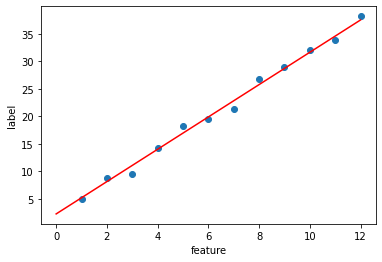

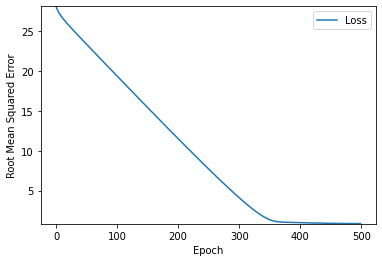

In [12]:
learning_rate=0.01
epochs= 500   # Replace ? with an integer.  try first with 100, then with 400, etc
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In Task 2, you increased the number of epochs to get the model to converge. Sometimes, you can get the model to converge more quickly by increasing the learning rate. However, setting the learning rate too high often makes it impossible for a model to converge. In Task 3, we've intentionally set the learning rate too high. Run the following code cell and see what happens.

Epoch 1/500


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 336ms/step - loss: 1120.9642 - root_mean_squared_error: 33.4808
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 6643080.0000 - root_mean_squared_error: 2577.4172
Epoch 3/500
1/1 [==============================] - 0s 15ms/step - loss: 1107.7579 - root_mean_squared_error: 33.2830
Epoch 4/500
1/1 [==============================] - 0s 12ms/step - loss: 6.5751 - root_mean_squared_error: 2.5642
Epoch 5/500
1/1 [==============================] - 0s 11ms/step - loss: 1.5533 - root_mean_squared_error: 1.2463
Epoch 6/500
1/1 [==============================] - 0s 11ms/step - loss: 1.4303 - root_mean_squared_error: 1.1959
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 1.3818 - root_mean_squared_error: 1.1755
Epoch 8/500
1/1 [==============================] - 0s 15ms/step - loss: 1.3365 - root_mean_squared_error: 1.1561
Epoch 9/500
1/1 [==============================] - 0s 12ms/step - loss: 1.2921 - root_mean

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


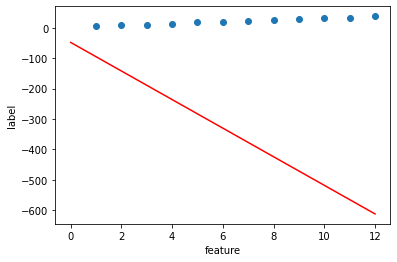

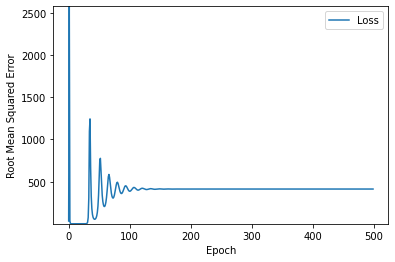

In [13]:

# Increase the learning rate and decrease the number of epochs.
learning_rate=100 
epochs=500 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

The resulting model is terrible; the red line doesn't align with the blue dots. Furthermore, the loss curve oscillates like a roller coaster. An oscillating loss curve strongly suggests that the learning rate is too high.

Epoch 1/70


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 326ms/step - loss: 589.2277 - root_mean_squared_error: 24.2740
Epoch 2/70
1/1 [==============================] - 0s 11ms/step - loss: 425.2664 - root_mean_squared_error: 20.6220
Epoch 3/70
1/1 [==============================] - 0s 10ms/step - loss: 330.7589 - root_mean_squared_error: 18.1868
Epoch 4/70
1/1 [==============================] - 0s 13ms/step - loss: 264.5120 - root_mean_squared_error: 16.2638
Epoch 5/70
1/1 [==============================] - 0s 10ms/step - loss: 214.3699 - root_mean_squared_error: 14.6414
Epoch 6/70
1/1 [==============================] - 0s 11ms/step - loss: 174.8733 - root_mean_squared_error: 13.2240
Epoch 7/70
1/1 [==============================] - 0s 11ms/step - loss: 143.0306 - root_mean_squared_error: 11.9595
Epoch 8/70
1/1 [==============================] - 0s 15ms/step - loss: 116.9943 - root_mean_squared_error: 10.8164
Epoch 9/70
1/1 [==============================] - 0s 11ms/step - loss: 95.5263 - root_mean

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


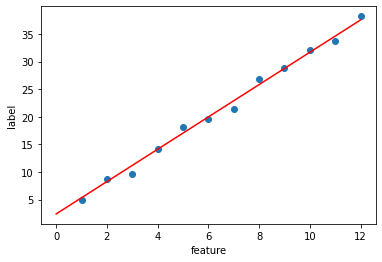

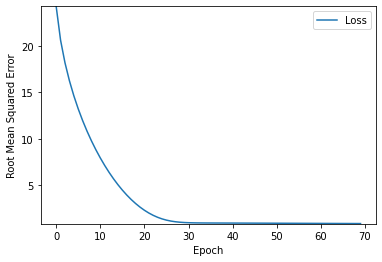

In [14]:

# Set the learning rate and number of epochs
learning_rate = 0.14  # Replace ? with a floating-point number
epochs = 70   # Replace ? with an integer

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

The system recalculates the model's loss value and adjusts the model's weights and bias after each iteration. Each iteration is the span in which the system processes one batch. For example, if the batch size is 6, then the system recalculates the model's loss value and adjusts the model's weights and bias after processing every 6 examples.

One epoch spans sufficient iterations to process every example in the dataset. For example, if the batch size is 12, then each epoch lasts one iteration. However, if the batch size is 6, then each epoch consumes two iterations.

It is tempting to simply set the batch size to the number of examples in the dataset (12, in this case). However, the model might actually train faster on smaller batches. Conversely, very small batches might not contain enough information to help the model converge.

Experiment with batch_size in the following code cell. What's the smallest integer you can set for batch_size and still have the model converge in a hundred epochs?

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


12/12 [==============================] - 0s 2ms/step - loss: 507.8239 - root_mean_squared_error: 22.5350
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 326.6805 - root_mean_squared_error: 18.0743
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 216.2418 - root_mean_squared_error: 14.7052
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 134.3331 - root_mean_squared_error: 11.5902
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 73.9852 - root_mean_squared_error: 8.6015
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 32.7213 - root_mean_squared_error: 5.7203
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 11.8059 - root_mean_squared_error: 3.4360
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 3.5261 - root_mean_squared_error: 1.8778
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 1.5681 - roo

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


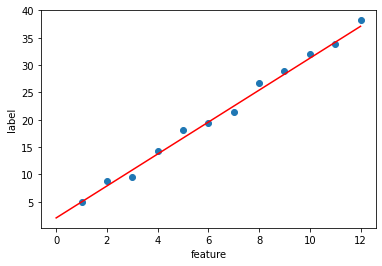

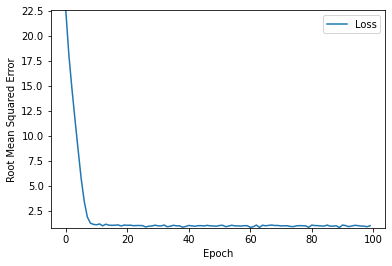

In [16]:
learning_rate=0.05
epochs=100
my_batch_size= 1  # Replace ? with an integer. try with any number, but 1 works fine

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# Summary of hyperparameter tuning
Most machine learning problems require a lot of hyperparameter tuning. Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly. You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero.
If the training loss does not converge, train for more epochs.
If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
Setting the batch size to a very small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory.
Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.